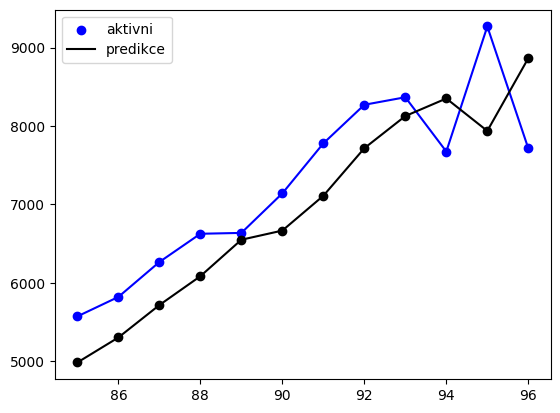

0
Mean absolute error: 614.52
Mean squared error: 483354.56
Root mean squared error: 695.24
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              4442.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):                    4.70e-93
Time:                        16:39:58   Log-Likelihood:                         -638.49
No. Observations:                  84   AIC:                                      1285.
Df Residuals:                      80   BIC:                                      1295.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std

In [33]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

import statsmodels.api as sm
test = True
out = True
graf = True


df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-1:])

graf = True
test = True
out = True

models = []
rmse_list = []
y_pred_list = []
#* training dataframe bez randomizace
df_train =df.drop(df.index[-12:])
df_train =df.drop(df.index[-12:])
#*test dataframe bez randomizace
df_test = df.drop(df.index[:-12])
df_test = df.drop(df.index[:-12])
df_test_graf = df_test

#* definovat data
X = df[["aktivni-1", "nove-1", "nove-2","zbytek-1"]]
y = df[['aktivni']]

#* training dataframe bez randomizace
X_train = X.drop(X.index[-12:])
y_train = y.drop(y.index[-12:])
#* testing dataframe bez randomizace
X_test = X.drop(X.index[:-12])
y_test = y.drop(y.index[:-12])
#*fit OLS regresi na train datech
model = sm.OLS(y_train,X_train).fit()
if test:
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_list.append(y_pred)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)
    
#*dotrenovat model na vsech datech
model = sm.OLS(y,X).fit()
if graf:
    #>>graf
    #* realita
    plt.scatter(df_test_graf.index,df_test['aktivni'],label="aktivni",color="blue")
    plt.plot(df_test_graf.index,df_test['aktivni'],color="blue")
    #* predikce
    plt.plot(df_test_graf.index, y_pred.values, label='predikce', color="black")
    plt.scatter(df_test_graf.index, y_pred.values, color="black")
    plt.legend()
    plt.show()
if out:
    print(len(models))
    print(f"Mean absolute error: {mae:.2f}")
    print(f"Mean squared error: {mse:.2f}")
    print(f"Root mean squared error: {rmse:.2f}")
    print(model.summary())

    aktivni-1  nove-1  nove-2  zbytek-1
97     7714.0  1674.0  2760.0    5872.0


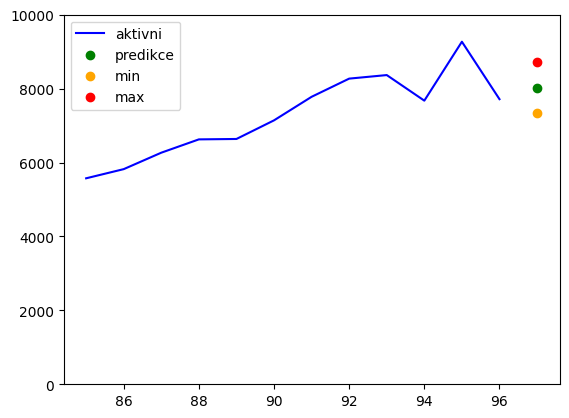


Model:      <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C966B0CE50>
Min:        7331
Predikce:   8026
Max:        8721
Rmse:       695



In [34]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df_orig = df.drop(df.index[-12:])

df_new = df.drop(df.index[:-1])
#df_new = df_new.drop(df_new.index[-11:])
df_train = df.drop(df.index[-12:])

x_new = df_new[["aktivni-1", "nove-1", "nove-2", "zbytek-1"]]
#?? for i in range(1,7):
i=1
print(x_new)
#>> predikce
predictions = []
y_pred = model.predict(x_new)
#>> graf
#* realita
plt.plot(df_test.index, df_test['aktivni'],label="aktivni",color="blue")

#* predikce
plt.scatter(df_new.index, y_pred.values, label='predikce', color="green")
plt.scatter(df_new.index, y_pred.values-rmse_values[0], label='min', color="orange")
plt.scatter(df_new.index, y_pred.values+rmse_values[0], label='max', color="red")
plt.ylim(0,10000)
plt.legend()
plt.show()
print(f"""
Model:      {model}
Min:        {int(y_pred-rmse)}
Predikce:   {int(y_pred)}
Max:        {int(y_pred+rmse)}
Rmse:       {int(rmse)}
""")